# **1. Veri Setinin Tanımlanması ve Problem**

In [ ]:

# İş Analitiği Proje Ödevi

# Proje süresi boyunca kullandığımız veri seti,Bu çalışma kapsamında analiz edilen veri seti,
# Bireylerin Ücret düzeyleri ile demografik, sosyoekonomik ve çalışma yaşamına ilişkin özellikleri arasındaki ilişkileri incelemek amacıyla yüklenmiştir.
# Veri seti, toplam 510 gözlem ve 10 değişkenden oluşmaktadır. Bu değişkenler arasında bireylerin
# yaşı, eğitim süresi, iş deneyimi, haftalık çalışma süresi, cinsiyeti, çalıştığı sektör, yaşadığı bölge, medeni durum gibi bilgiler yer almaktadır.
# Temel Bağımlı değişkenlerimiz bireylerin yıllık ücreti (wage) olarak belirlenmiştir.
# Bu veri seti iş gücü piyasasında bireylerin gelir seviyesini etkileyen faktörlerin analiz edilmesini ve yorumlanmasını sağlamaktadır.



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#1. Başlık, giriş (problem) ve veri setinin tanımanması

# Excel dosyasını colab üzerine yükleme.

# WageData verisini içeri aktarma.
df = pd.read_csv('./WageDataI.csv')
# Veri setinin ilk gözlem satırlarını görüntüleme
df.head()
# Veri Setinin Yapısı
df.info()
# Sütun İsimleri ve Türleri
print("Sütunlar:\n", df.columns)

print("\nVeri Tipleri:\n", df.dtypes)

# Veri setinin genel özelliklerini inceleyelim
print("Veri Setinin Boyutları:", df.shape)
print("\nVeri Setinin İlk Beş Satırı:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wage                   510 non-null    float64
 1   age                    510 non-null    int64  
 2   education_years        510 non-null    int64  
 3   experience_years       510 non-null    int64  
 4   gender                 510 non-null    object 
 5   sector                 510 non-null    object 
 6   region                 510 non-null    object 
 7   marital_status         510 non-null    object 
 8   hours_worked_per_week  510 non-null    int64  
 9   union_member           510 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 40.0+ KB
Sütunlar:
 Index(['wage', 'age', 'education_years', 'experience_years', 'gender',
       'sector', 'region', 'marital_status', 'hours_worked_per_week',
       'union_member'],
      dtype='object')

Veri Tipl

# **2. Nicel Verilerin Tanımlayıcı İstatistikleri**


In [ ]:
#2. Nicel verilerin tanımlayıcı istatistiklerini hesapla


import pandas as pd

df = pd.read_csv('./WageDataI.csv')

# wage sütunu için tanımlayıcı istatistikler
wage_stats = df['wage'].describe()
print(wage_stats)


# "wage" sütununun tanımlayıcı istatistiklerini hesapla
print(" Maaş (wage) Değişkeni Tanımlayıcı İstatistikleri:")
wage_stats = df['wage'].describe()

# Sonuçları yazdır



# Çeyrekler arası uzaklık (IQR)
IQR = wage_stats['75%'] - wage_stats['25%']
print(f"\nÇeyreklerarası Uzaklık (IQR): {IQR}")

# Alt ve üst sınırlar
alt_sinir = wage_stats['25%'] - 1.5 * IQR
ust_sinir = wage_stats['75%'] + 1.5 * IQR
print(f"Alt Sınır: {alt_sinir}")
print(f"Üst Sınır: {ust_sinir}")

# Aralık
aralik = wage_stats['max'] - wage_stats['min']
print(f"\nAralık: {aralik}")

# Varyans
varyans = df['wage'].var()
print(f"\nVaryans: {varyans}")

# Ortalama
ortalama = df['wage'].mean()
print(f"\nOrtalama: {ortalama}")

# Mod (en sık tekrar eden değer)
mod = df['wage'].mode()[0]  # İlk modu alıyoruz.
print(f"\nMod: {mod}")


# Standart Sapma
standart_sapma = df['wage'].std()
print(f"\nStandart Sapma: {standart_sapma}")

# Medyan
medyan = df['wage'].median()
print(f"\nMedyan: {medyan}")

df.describe()



count      510.000000
mean     30811.741843
std       5386.972640
min      16789.790000
25%      27340.462500
50%      30838.400000
75%      34537.630000
max      43806.800000
Name: wage, dtype: float64
 Maaş (wage) Değişkeni Tanımlayıcı İstatistikleri:

Çeyreklerarası Uzaklık (IQR): 7197.167499999996
Alt Sınır: 16544.711250000008
Üst Sınır: 45333.38124999999

Aralık: 27017.010000000002

Varyans: 29019474.22359069

Ortalama: 30811.741843137253

Mod: 16789.79

Standart Sapma: 5386.972639951932

Medyan: 30838.4


,wage,age,education_years,experience_years,hours_worked_per_week
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,30811.741843,41.194118,13.437255,22.060784,44.868627
std,5386.972640,13.555806,4.677306,14.033857,4.734233
min,16789.790000,18.000000,5.000000,0.000000,30.000000
25%,27340.462500,29.000000,10.000000,11.000000,42.000000
50%,30838.400000,41.000000,14.000000,22.000000,45.000000
75%,34537.630000,53.000000,17.750000,33.000000,48.000000
max,43806.800000,64.000000,20.000000,51.000000,58.000000


# **3. Nicel verilerin tanımlayıcı istatistiklerinin yorumları**




## **3.1 wage (maaş) Verisinin İstatistiksel Yorum**


In [ ]:


wage_status = df['wage'].describe()

print("Maaş Değişkeni Tanımlayıcı İstatistikleri Yorumları:")
print(wage_status)

Maaş Değişkeni Tanımlayıcı İstatistikleri Yorumları:
count      510.000000
mean     30811.741843
std       5386.972640
min      16789.790000
25%      27340.462500
50%      30838.400000
75%      34537.630000
max      43806.800000
Name: wage, dtype: float64


# **4.Nitel Verilerin Frekans Dağılımı**

**4.1 Nitel Verilerin Frekans Dağılımı**

In [ ]:
import pandas as pd

df = pd.read_csv('./WageDataI.csv')

# Calculate the frequency distribution for the 'Sector' column
sector_frequency = df['sector'].value_counts()

# Print the frequency distribution
print("Sector Frequency Distribution:")
sector_frequency

Sector Frequency Distribution:


,count
sector,
Manufacturing,81
Public,77
Finance,76
IT,74
Construction,69
Agriculture,69
Services,64


# **5. Nitel Verilerin Grafikler ile İncelenmesi**

## 5.1 Sector verisinin Frekans Dağılımı, Çubuk, Birikimli Çubuk, Pareto ve Pasta Grafikleri

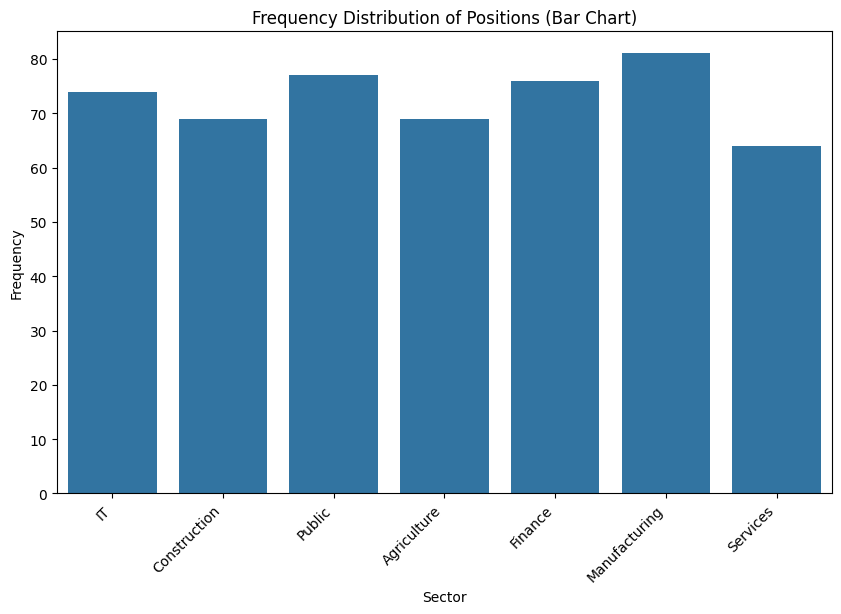

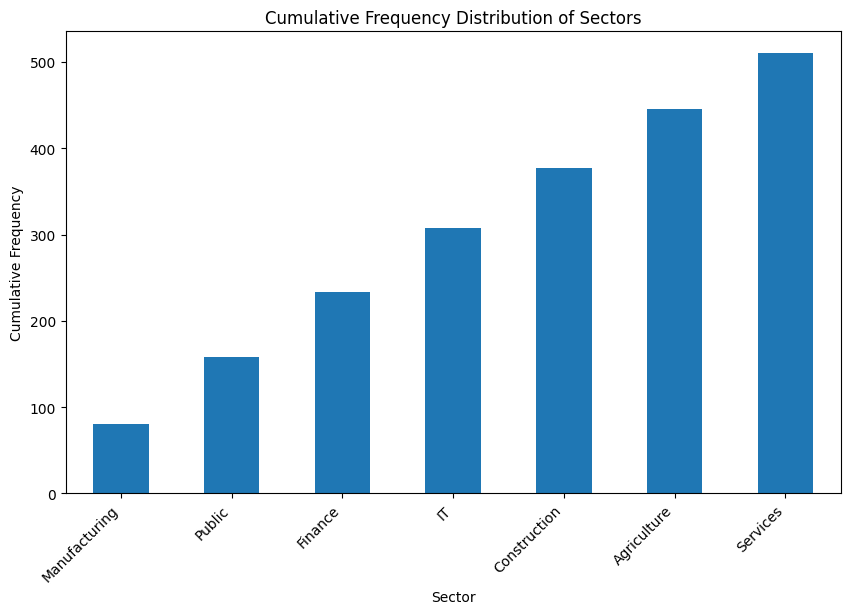

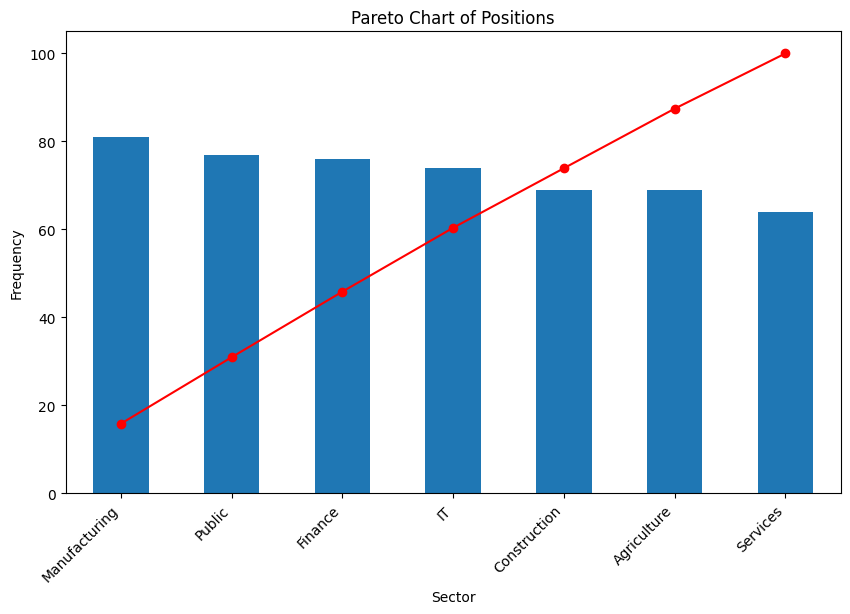

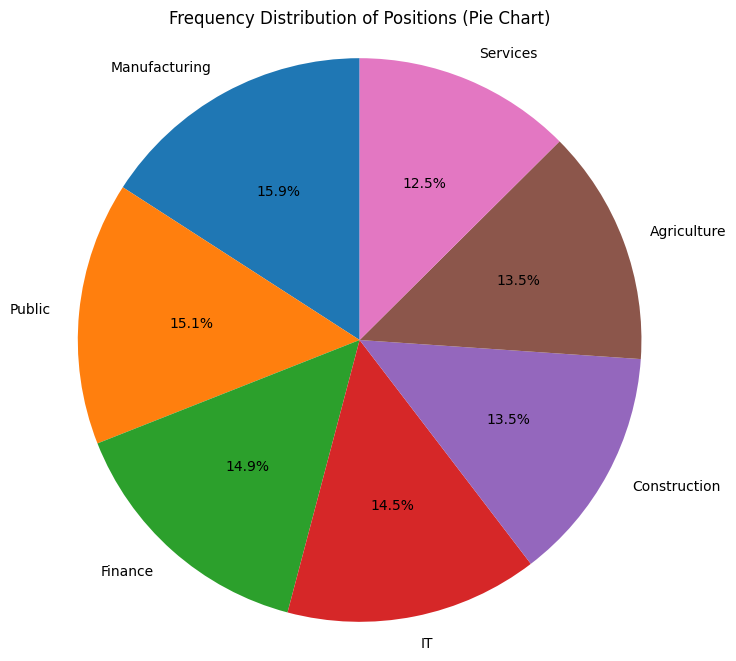

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



df = pd.read_csv('./WageDataI.csv')
# Calculate the frequency distribution for the 'Sector' column
sector_frequency = df['sector'].value_counts()

# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='sector', data=df)
plt.title('Frequency Distribution of Positions (Bar Chart)')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Cumulative bar chart
plt.figure(figsize=(10, 6))
sector_frequency.cumsum().plot(kind='bar')
plt.title('Cumulative Frequency Distribution of Sectors')
plt.xlabel('Sector')
plt.ylabel('Cumulative Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Pareto chart
plt.figure(figsize=(10, 6))
sector_frequency.plot(kind='bar')
plt.title('Pareto Chart of Positions')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add cumulative percentage line
cumulative_percentage = sector_frequency.cumsum() / sector_frequency.sum() * 100
plt.plot(cumulative_percentage, marker='o', linestyle='-', color='r')
plt.show()


# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_frequency, labels=sector_frequency.index, autopct='%1.1f%%', startangle=90)
plt.title('Frequency Distribution of Sector (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 5.2 Sector - Wage Arasındaki ilişkinin Box and Whisker Grafiği ile Yorumu

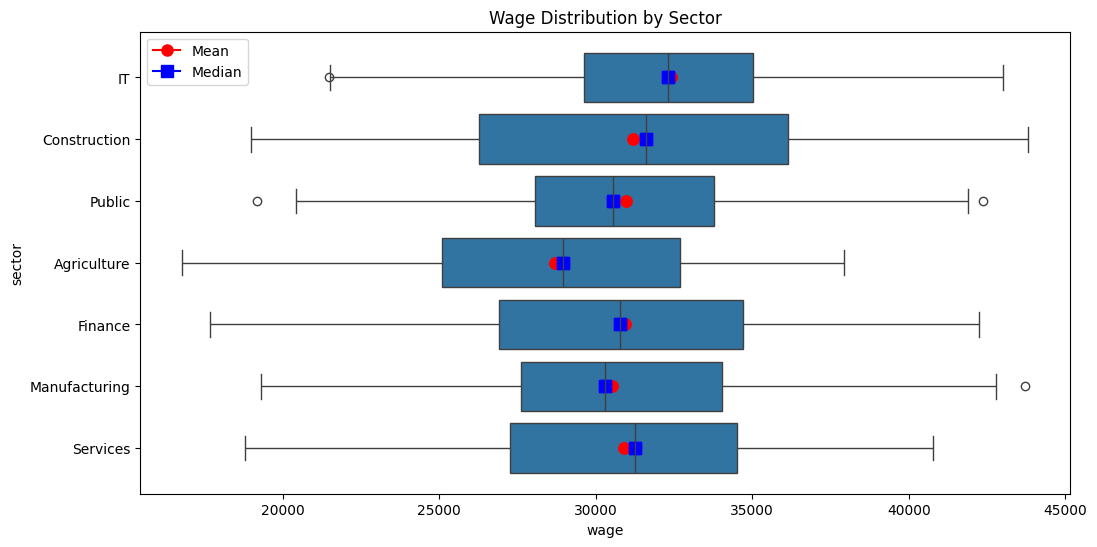

,mean,median
sector,,
Agriculture,28691.804783,28963.200
Construction,31191.953768,31610.190
Finance,30920.358026,30771.600
IT,32411.925135,32318.550
Manufacturing,30509.105309,30286.330
Public,30978.106753,30534.490
Services,30891.055938,31238.595


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



df = pd.read_csv('./WageDataI.csv')
# Calculate the frequency distribution for the 'Sector' column
sector_frequency = df['sector'].value_counts()


# Calculate mean and median wage for each sector
sector_wage_stats = df.groupby('sector')['wage'].agg(['mean', 'median'])

# Create a horizontal box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='wage', y='sector', data=df, orient='h')
plt.title('Wage Distribution by Sector')
plt.xlabel('wage')
plt.ylabel('sector')

# Add mean and median markers to the box plot
for position in sector_wage_stats.index:
    mean_salary = sector_wage_stats.loc[position, 'mean']
    median_salary = sector_wage_stats.loc[position, 'median']
    plt.plot([mean_salary, mean_salary], [position, position], marker='o', markersize=8, color='red', label='Mean' if position == sector_wage_stats.index[0] else "") # Add label only for the first plot
    plt.plot([median_salary, median_salary], [position, position], marker='s', markersize=8, color='blue', label='Median' if position == sector_wage_stats.index[0] else "") # Add label only for the first plot


plt.legend()
plt.show()

# Display the salary statistics table
sector_wage_stats


















## 5.3 Hours_Worked_Per_Week (Haftalık çalışma) saatine göre almış olduğu Wage (Maaş) Serpilim Grafiği

## 5.3.1 Hours_Worked_Per_Week - Wage Serpilim Grafiğini Her bir Hours_Worked_Per_Week de oluşan Ortalama Wage Eğiri ile İnceleme

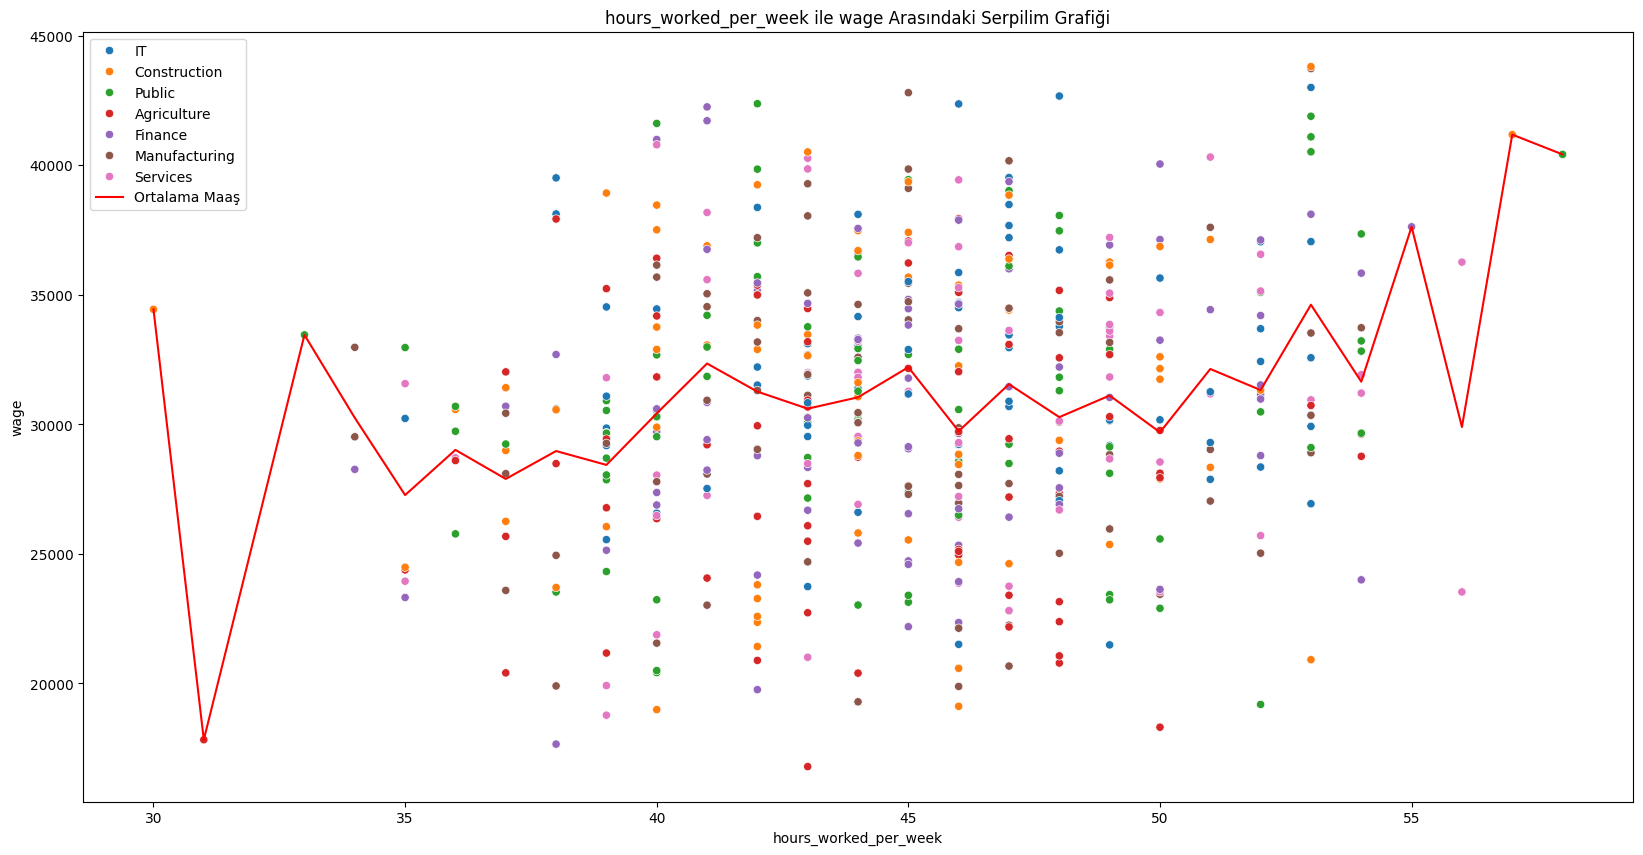

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('./WageDataI.csv')
# Calculate the frequency distribution for the 'Sector' column
sector_frequency = df['sector'].value_counts()


plt.figure(figsize=(20, 10))
sns.scatterplot(x='hours_worked_per_week', y='wage', data=df, hue='sector')

# Calculate the mean salary for each experience level
mean_wage_by_hours_worked_per_week = df.groupby('hours_worked_per_week')['wage'].mean()

# Plot the mean salary curve
plt.plot(mean_wage_by_hours_worked_per_week.index, mean_wage_by_hours_worked_per_week.values, color='red', label='Ortalama Maaş')


plt.title('hours_worked_per_week ile wage Arasındaki Serpilim Grafiği')
plt.xlabel('hours_worked_per_week')
plt.ylabel('wage')
plt.legend()
plt.show()

# **6. Nitel Verilerin Yorumları**

# **7. Bağımlı ve Bağımsız Değişkenlerin Çarpık / Simetrik Dağılımları**

Grafiklerin simetrik mi yoksa çarpık mı olduğunu değerlendirmek için, Pandas kütüphanesinin sunduğu Skewness (çarpıklık) ölçümü otomatik olarak hesaplanacaktır. Bu hesaplamanın ardından, literatürde sıkça kullanılan aşağıdaki değer aralıklarına göre yorumlama yapılacak ve dağılımın yapısı belirlenecektir:

Medyan = Ortalama: Bu durumda dağılım simetrik kabul edilir, yani çarpıklık gözlenmez.

Ortalama > Medyan: Bu durum, verilerin sağa çarpık (pozitif çarpıklık) olduğunu gösterir.

Ortalama < Medyan: Bu ise verilerin sola çarpık (negatif çarpıklık) olduğunu ifade eder.

## 7.1 Sector - Wage Çarpık / Simetrik Dağılımları Grafikleri


Services Sektörü için:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.

Services Sektörü için:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.

Services Sektörü için:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.

Services Sektörü için:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.

Services Sektörü için:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.

Services Sektörü için:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.

Services Sektörü için:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.


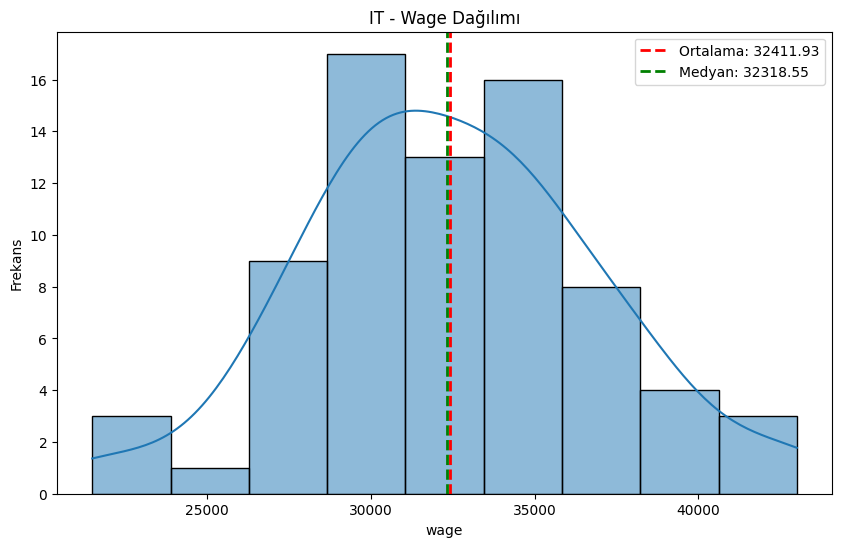

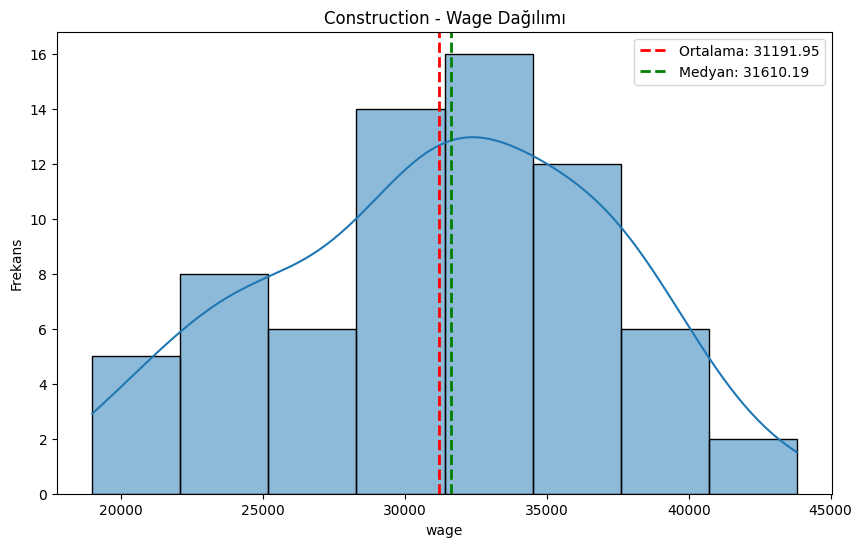

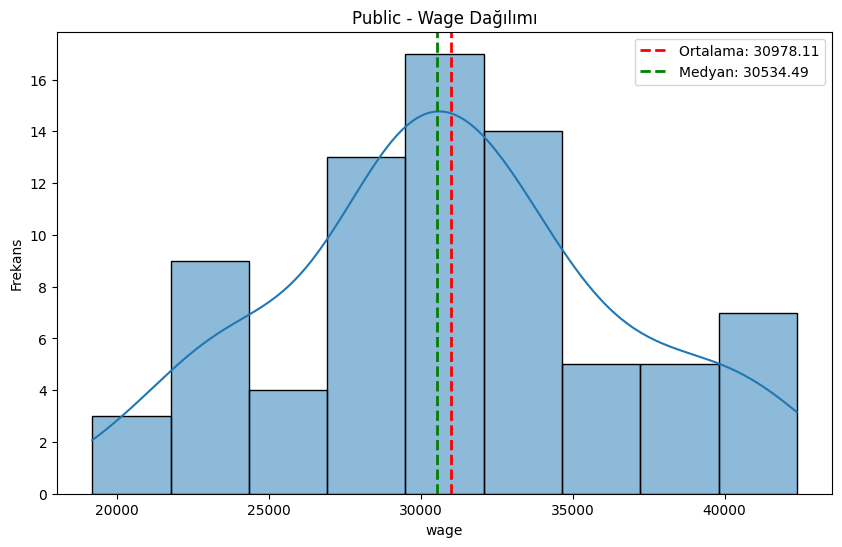

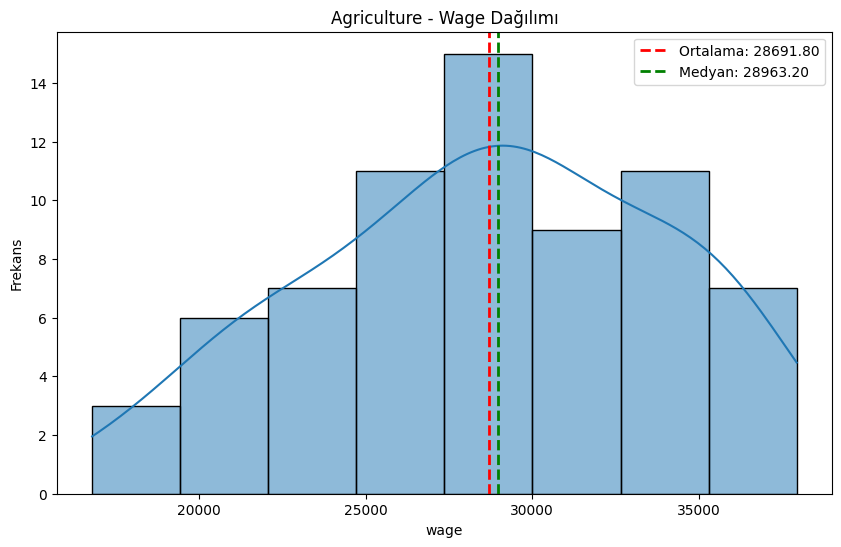

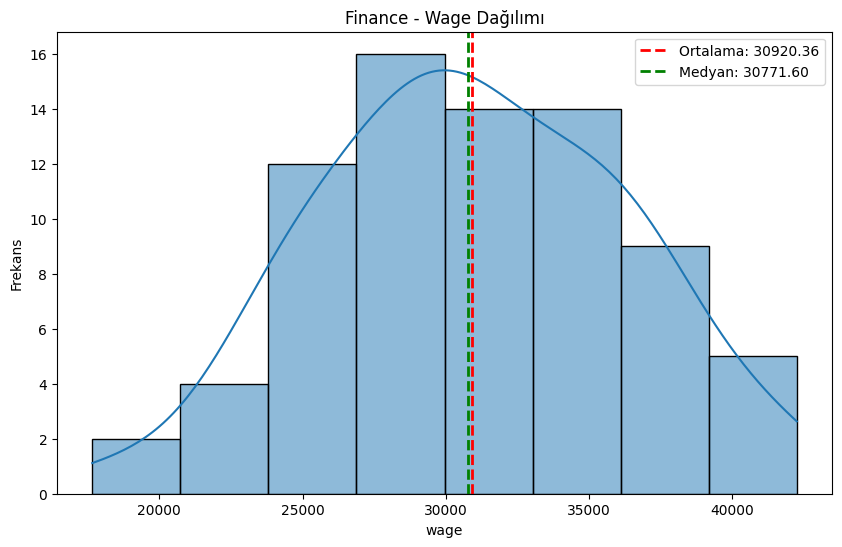

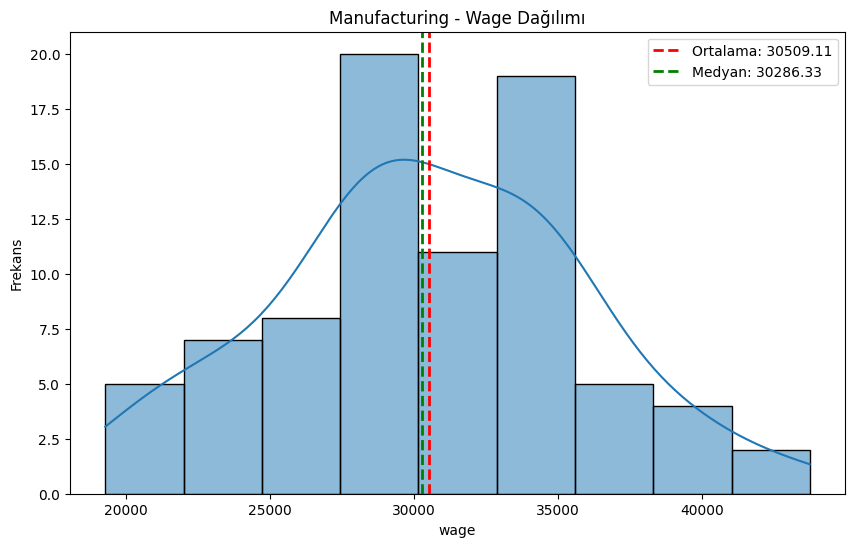

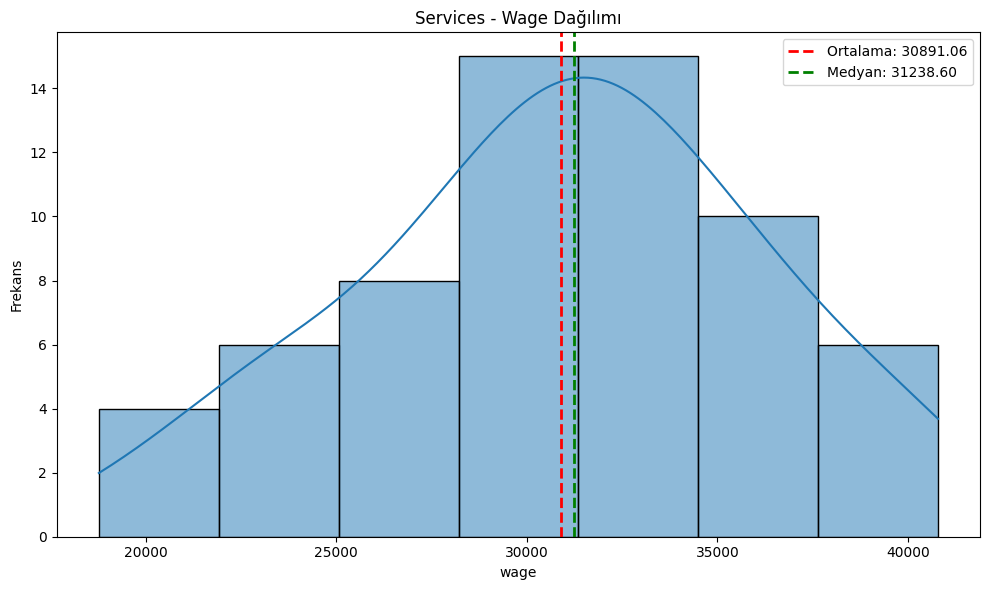

In [ ]:
# prompt: her bir sector için sector - wage arasında Çarpık / Simetrik dağılımını nasıl çizeriz? Medyan ve Ortalama değerleri grafik üzerinde çizdirebilir misin? çarpıklık yönünü medyan>ortalama , medyan<ortalama ve medyan = ortalama sınır koşullarına göre yorumlar mısın skewness formülünü kullanmadan türkçe yorumlar mısın?



import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



df = pd.read_csv('./WageDataI.csv')
# Calculate the frequency distribution for the 'Sector' column
sector_frequency = df['sector'].value_counts()


# Sector - Wage Çarpık / Simetrik Dağılımları Grafikleri
for position in df['sector'].unique():
    plt.figure(figsize=(10, 6))
    subset = df[df['sector'] == position]
    sns.histplot(subset['wage'], kde=True)

    plt.title(f'{position} - Wage Dağılımı')
    plt.xlabel('wage')
    plt.ylabel('Frekans')

    # Calculate mean and median
    mean_wage = subset['wage'].mean()
    median_wage = subset['wage'].median()

    # Add vertical lines for mean and median
    plt.axvline(mean_wage, color='red', linestyle='dashed', linewidth=2, label=f'Ortalama: {mean_wage:.2f}')
    plt.axvline(median_wage, color='green', linestyle='dashed', linewidth=2, label=f'Medyan: {median_wage:.2f}')
    plt.legend()

    # Interpret skewness based on mean and median
    print(f"\n{sector} Sektörü için:")
    if abs(mean_wage - median_wage) < 0.1 * mean_wage: # A small tolerance for "equal"
        print("Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.")
    elif mean_wage > median_wage:
        print("Ortalama, Medyandan büyük. Bu durum, dağılımın sağa doğru uzandığını (pozitif çarpık) gösterir. Yüksek ücretli az sayıda birey dağılımı sağa çekmiş.")
    else: # mean_wage < median_wage
        print("Ortalama, Medyandan küçük. Bu durum, dağılımın sola doğru uzandığını (negatif çarpık) gösterir. Düşük ücretli az sayıda birey dağılımı sola çekmiş.")


plt.tight_layout()
plt.show()


## 7.2 Sector - hours_worked_per_week Çarpık / Simetrik Dağılımları



IT Sektörü için Haftalık Çalışma Saati Dağılımı:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.


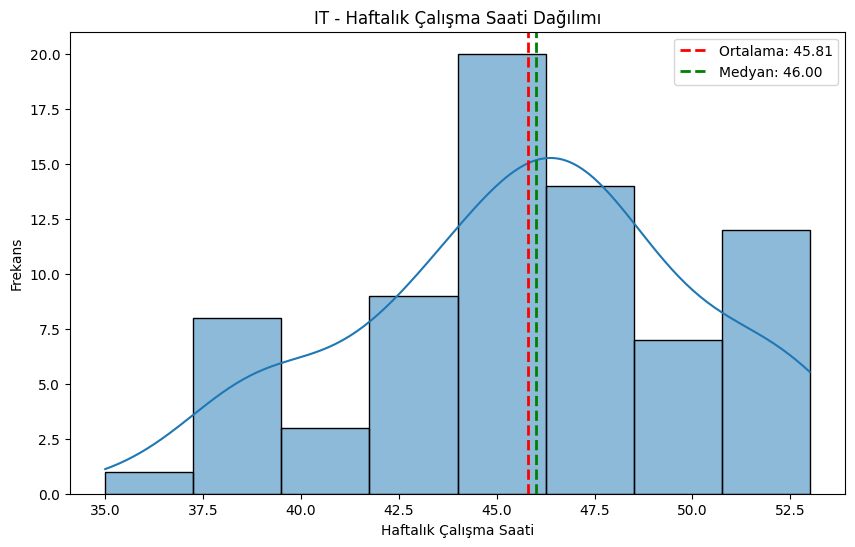


Construction Sektörü için Haftalık Çalışma Saati Dağılımı:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.


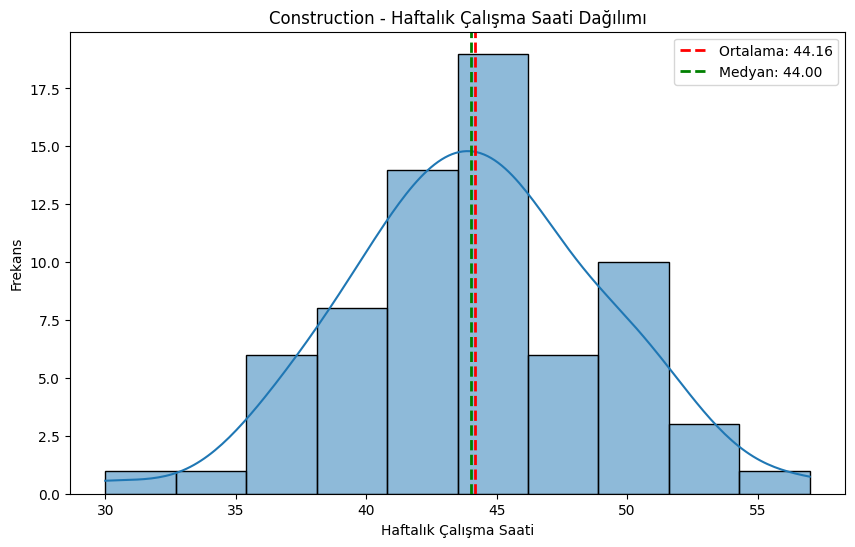


Public Sektörü için Haftalık Çalışma Saati Dağılımı:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.


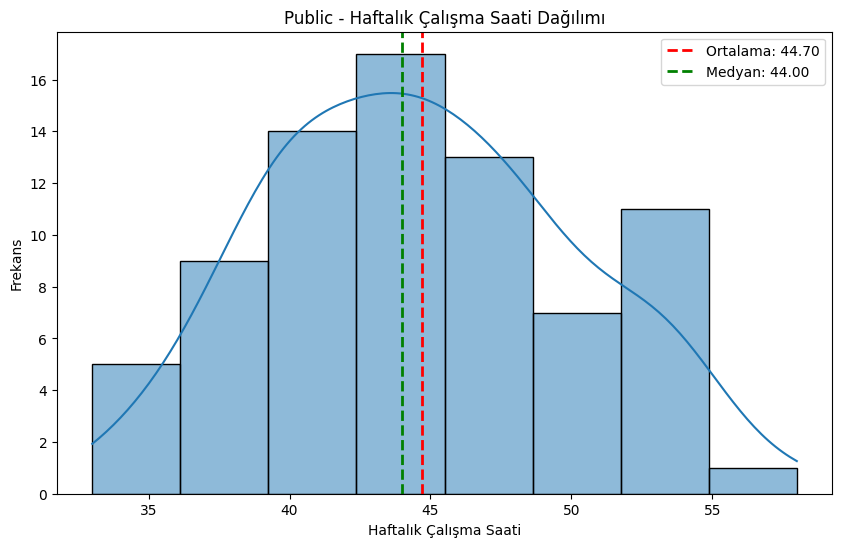


Agriculture Sektörü için Haftalık Çalışma Saati Dağılımı:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.


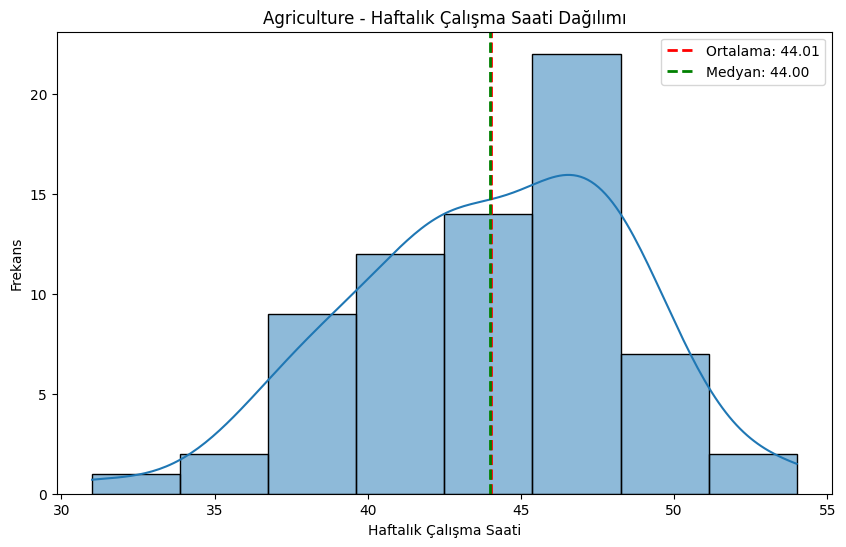


Finance Sektörü için Haftalık Çalışma Saati Dağılımı:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.


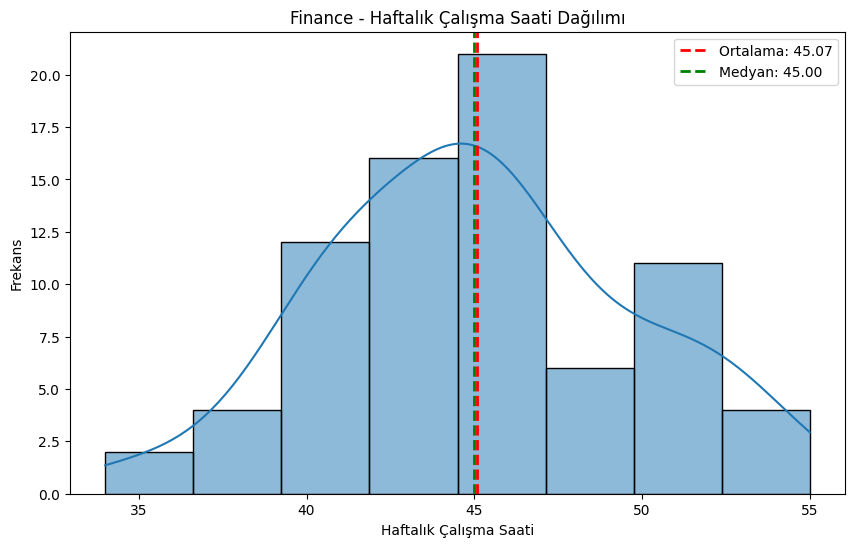


Manufacturing Sektörü için Haftalık Çalışma Saati Dağılımı:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.


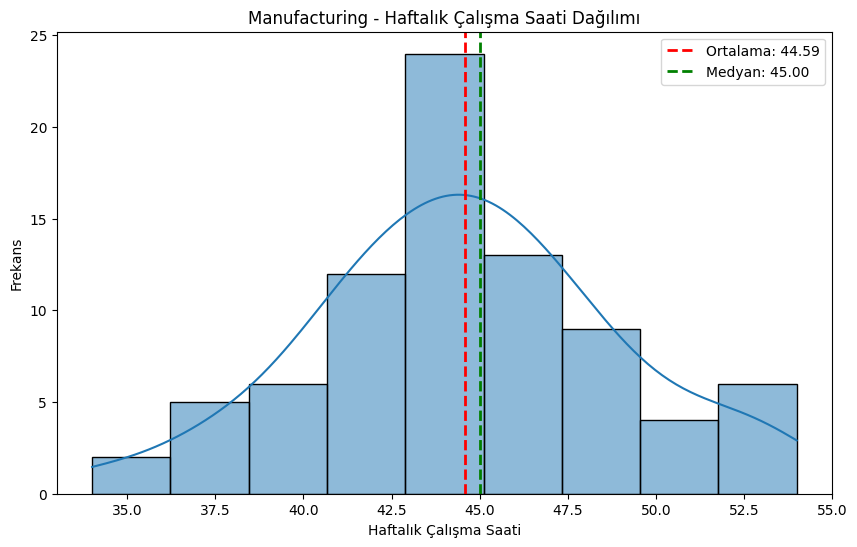


Services Sektörü için Haftalık Çalışma Saati Dağılımı:
Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.


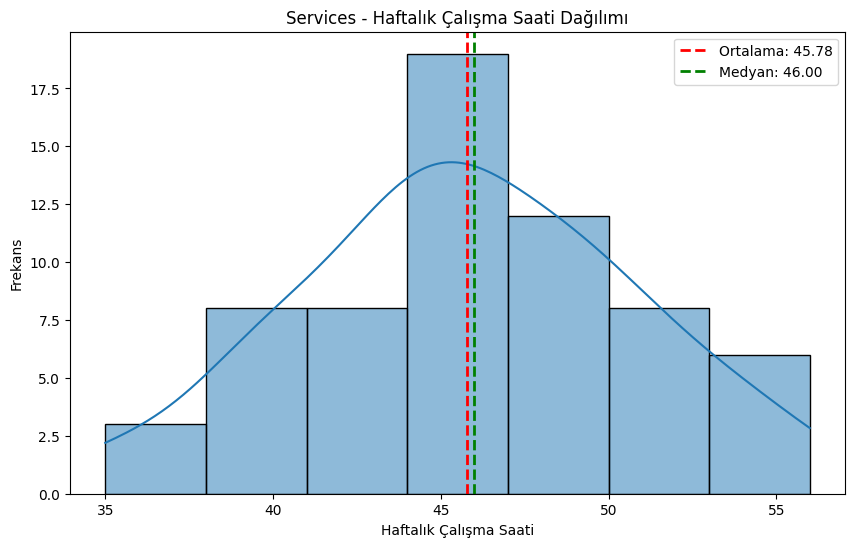

In [ ]:
# prompt: her bir sector için sector - hours_worked_per_week arasında Çarpık / Simetrik dağılımını nasıl çizeriz? Medyan ve Ortalama değerleri grafik üzerinde çizdirebilir misin? çarpıklık yönünü medyan>ortalama , medyan<ortalama ve medyan = ortalama sınır koşullarına göre yorumlar mısın skewness formülünü kullanmadan türkçe yorumlar mısın?

# 7.2 Sector - hours_worked_per_week Çarpık / Simetrik Dağılımları

import matplotlib.pyplot as plt
import seaborn as sns

for sector in df['sector'].unique():
    plt.figure(figsize=(10, 6))
    subset = df[df['sector'] == sector]
    sns.histplot(subset['hours_worked_per_week'], kde=True)

    plt.title(f'{sector} - Haftalık Çalışma Saati Dağılımı')
    plt.xlabel('Haftalık Çalışma Saati')
    plt.ylabel('Frekans')

    # Calculate mean and median
    mean_hours = subset['hours_worked_per_week'].mean()
    median_hours = subset['hours_worked_per_week'].median()

    # Add vertical lines for mean and median
    plt.axvline(mean_hours, color='red', linestyle='dashed', linewidth=2, label=f'Ortalama: {mean_hours:.2f}')
    plt.axvline(median_hours, color='green', linestyle='dashed', linewidth=2, label=f'Medyan: {median_hours:.2f}')
    plt.legend()

    # Interpret skewness based on mean and median
    print(f"\n{sector} Sektörü için Haftalık Çalışma Saati Dağılımı:")
    if abs(mean_hours - median_hours) < 0.1 * mean_hours: # A small tolerance for "equal"
        print("Ortalama ve Medyan birbirine yakın, dağılım yaklaşık olarak simetrik görünüyor.")
    elif mean_hours > median_hours:
        print("Ortalama, Medyandan büyük. Bu durum, dağılımın sağa doğru uzandığını (pozitif çarpık) gösterir. Yüksek haftalık çalışma saatine sahip az sayıda birey dağılımı sağa çekmiş.")
    else: # mean_hours < median_hours
        print("Ortalama, Medyandan küçük. Bu durum, dağılımın sola doğru uzandığını (negatif çarpık) gösterir. Düşük haftalık çalışma saatine sahip az sayıda birey dağılımı sola çekmiş.")

    plt.show()


# **8. Bağımlı ve Bağımsız Değişkenlerin Çarpık/Simetrik Dağılımlarının Yorumlanması**

In [ ]:
# prompt: 7.1 ve 7.2 başlıkta, komutları çalıştırdıktan sonra, tüm sector verileri için oluşan yorumları tablo haline getirir misin?

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



df = pd.read_csv('./WageDataI.csv')
# Calculate the frequency distribution for the 'Sector' column
sector_frequency = df['sector'].value_counts()

comments = []

for position in df['sector'].unique():
    subset = df[df['sector'] == position]
    mean_wage = subset['wage'].mean()
    median_wage = subset['wage'].median()
    mean_hours_worked_per_week = subset['hours_worked_per_week'].mean()
    median_hours_worked_per_week = subset['hours_worked_per_week'].median()

    # Wage Skewness Comment
    wage_comment = ""
    if abs(mean_wage - median_wage) < 1e-6:
        wage_comment = "Simetrik"
    elif mean_wage > median_wage:
        wage_comment = "Sağa Çarpık"
    else:
        wage_comment = "Sola Çarpık"

    # hours_worked_per_week Skewness Comment
    hours_worked_per_week_comment = ""
    if abs(mean_hours_worked_per_week - median_hours_worked_per_week) < 1e-6:
        hours_worked_per_week_comment = "Simetrik"
    elif mean_hours_worked_per_week > median_hours_worked_per_week:
        hours_worked_per_week_comment = "Sağa Çarpık"
    else:
        hours_worked_per_week_comment = "Sola Çarpık"

    comments.append([position, wage_comment, hours_worked_per_week_comment])

# Create a DataFrame from the comments list
comments_df = pd.DataFrame(comments, columns=['sector', 'wage Skewness', 'hours_worked_per_week Skewness'])

# Display the DataFrame
comments_df

,sector,wage Skewness,hours_worked_per_week Skewness
0,IT,Sağa Çarpık,Sola Çarpık
1,Construction,Sola Çarpık,Sağa Çarpık
2,Public,Sağa Çarpık,Sağa Çarpık
3,Agriculture,Sola Çarpık,Sağa Çarpık
4,Finance,Sağa Çarpık,Sağa Çarpık
5,Manufacturing,Sağa Çarpık,Sola Çarpık
6,Services,Sola Çarpık,Sola Çarpık


# **9. Bağımlı ve Bağımsız Değişkenlerin Korelasyon ve Anlamlılık Düzeyleri**

In [ ]:
# prompt: Her bir sector için sector ile wage arasında  korelasyon (ilinti) katsayısı ve anlamlılık düzeyi nasıl bulurum ve bunu tablo halinde nasıl yazdırırım?

from scipy.stats import pearsonr


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



df = pd.read_csv('./WageDataI.csv')
# Calculate the frequency distribution for the 'Sector' column
sector_frequency = df['sector'].value_counts()


results = []
for wage in df['sector'].unique():
    subset = df[df['sector'] == position]
    if len(subset) > 1:  # Ensure enough data points for correlation
        correlation, p_value = pearsonr(subset['wage'], subset['hours_worked_per_week'])
        results.append([wage, correlation, p_value])
    else:
        results.append([wage, "Not enough data", "Not enough data"])

correlation_df = pd.DataFrame(results, columns=['wage', 'Correlation', 'P-value'])
correlation_df

,wage,Correlation,P-value
0,IT,0.166509,0.188503
1,Construction,0.166509,0.188503
2,Public,0.166509,0.188503
3,Agriculture,0.166509,0.188503
4,Finance,0.166509,0.188503
5,Manufacturing,0.166509,0.188503
6,Services,0.166509,0.188503


# **10.	Bağımlı ve Bağımsız Değişkenlerin Korelasyon ve Anlamlılık Düzeyleri Yorumları**

Korelasyon Katsayısı ve Anlamlılık Düzeyi Analizi
Bu çalışmada, çeşitli sektörlerde ücret (wage) değişkeni ile sektör değişkenleri arasındaki ilişki analiz edilmiştir. Elde edilen Pearson korelasyon katsayısı 0.1665 olup, bu değer pozitif yönde zayıf bir ilişkiye işaret etmektedir.

 Korelasyon Katsayısının Yorumu (r = 0.1665):
Pozitif işaretli olduğu için, ücret arttıkça ilgili sektör değişkeni de artma eğilimindedir.

Ancak, mutlak değeri 0.3'ten küçük olduğu için, bu ilişki zayıf düzeydedir.

|r| = 0.1665 → Zayıf pozitif ilişki

 Anlamlılık Düzeyi (p = 0.1885):
p-değeri 0.05’in üzerinde olduğundan, bu ilişki istatistiksel olarak anlamlı değildir.

p = 0.1885 > 0.05 → Anlamlı değil

# **11.	Basit Doğrusal Regresyon Modelinin Kurulması**

## 11.1. Basit Doğrusal Regresyon Modeli Görseli

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     13.02
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           0.000339
Time:                        14:48:54   Log-Likelihood:                -5098.5
No. Observations:                 510   AIC:                         1.020e+04
Df Residuals:                     508   BIC:                         1.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.274e+

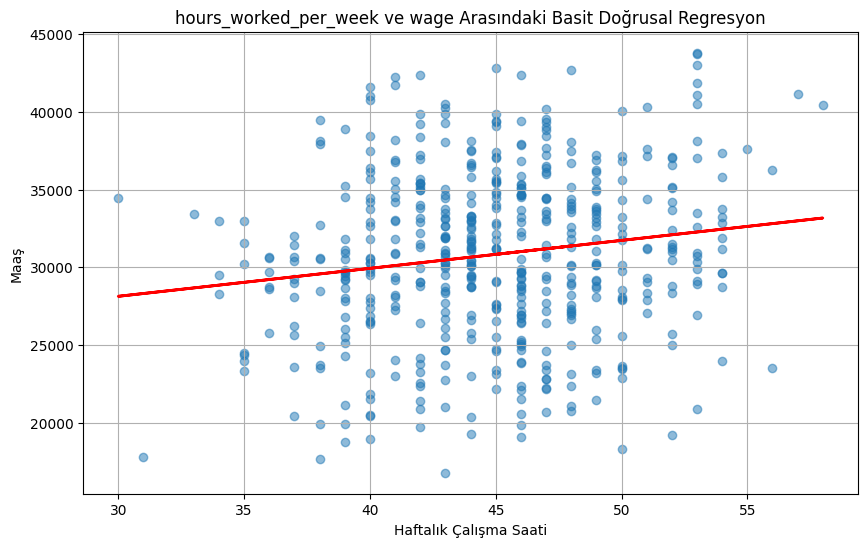

In [ ]:
# prompt: Wage (y ekseni ) ve hours_worked_per_week (x ekseni) arasında  regresyon modeli oluşutup grafiğini çizebilir misin?

import statsmodels.api as sm
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



df = pd.read_csv('./WageDataI.csv')
# Calculate the frequency distribution for the 'Sector' column
sector_frequency = df['sector'].value_counts()

# Bağımsız değişken (X) ve bağımlı değişken (y) tanımlama
X = df['hours_worked_per_week']
y = df['wage']

# Sabit terimi ekleme
X = sm.add_constant(X)

# Regresyon modelini oluşturma ve fit etme
model = sm.OLS(y, X).fit()

# Model özetini yazdırma (isteğe bağlı)
print(model.summary())

# Regresyon doğrusunu çizme
plt.figure(figsize=(10, 6))
plt.scatter(df['hours_worked_per_week'], df['wage'], alpha=0.5)  # Veri noktaları
plt.plot(df['hours_worked_per_week'], model.predict(X), color='red', linewidth=2)  # Regresyon doğrusu

plt.title('hours_worked_per_week ve wage Arasındaki Basit Doğrusal Regresyon')
plt.xlabel('Haftalık Çalışma Saati')
plt.ylabel('Maaş')
plt.grid(True)
plt.show()

## 11.2. Basit Regresyon Modelinin Formülü ve OLS Sonuçları

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings

# Uyarı mesajlarını kapat
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('./WageDataI.csv')
# Calculate the frequency distribution for the 'Sector' column
sector_frequency = df['sector'].value_counts()

# Veriyi hazırlama
X = df[['hours_worked_per_week']]  # Bağımsız değişken
y = df['wage']               # Bağımlı değişken

# Sabit terim ekleme
X = sm.add_constant(X)

# Regresyon modeli
model = sm.OLS(y, X).fit()

# OLS özet tablosu
print("\n--- OLS Özet Tablosu ---")
print(model.summary())

# Regresyon formülü
print("\n--- Regresyon Formülü ---")
print(f"wage = {model.params[0]:.2f} + {model.params[1]:.2f} * hours_worked_per_week")

# Özet bilgiler
print("\n--- Regresyon Modeli Özeti ---")
print(f"Intercept (Beta0): {model.params[0]:.2f}")
print(f"Eğim Katsayısı (Beta1): {model.params[1]:.2f}")
print(f"Intercept için p-değeri: {model.pvalues[0]:.4f}")
print(f"Eğim için p-değeri: {model.pvalues[1]:.4f}")
print(f"Eğim için %95 Güven Aralığı: {model.conf_int().loc['hours_worked_per_week'].tolist()}")

# Anlamlılık kontrolü
if model.pvalues[0] < 0.05:
    print("Beta0 (intercept) istatistiksel olarak anlamlıdır.")
else:
    print("Beta0 (intercept) istatistiksel olarak anlamlı değildir.")

if model.pvalues[1] < 0.05:
    print("Beta1 (eğim katsayısı) istatistiksel olarak anlamlıdır.")
else:
    print("Beta1 (eğim katsayısı) istatistiksel olarak anlamlı değildir.")


--- OLS Özet Tablosu ---
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     13.02
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           0.000339
Time:                        09:01:16   Log-Likelihood:                -5098.5
No. Observations:                 510   AIC:                         1.020e+04
Df Residuals:                     508   BIC:                         1.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
cons

# **12.	Basit Doğrusal Regresyon Modelinin Yorumlanması**

In [ ]:
# prompt: 11. madde yaptığım doğrusal regresyon modellerinin basit doğrusal regresyon modelinin yorumlanması

# Basit Doğrusal Regresyon Modeli Yorumu

print("\n--- Basit Doğrusal Regresyon Modeli Yorumu ---")

# Intercept (Sabit Terim - Beta0) Yorumu
print(f"\nIntercept (Sabit Terim): {model.params[0]:.2f}")
print("hours_worked_per_week (haftalık çalışma saati) 0 olduğunda (teorik olarak), wage'in (maaşın) ortalama değeri tahminen bu değerdir. Ancak, haftalık çalışma saatinin gerçekten 0 olmasının anlamlı olmadığı durumlarda bu yorum dikkatli yapılmalıdır. Bu genellikle modelin başlangıç noktasını temsil eder.")
if model.pvalues[0] < 0.05:
    print(f"Intercept'in (p-değeri = {model.pvalues[0]:.4f}) istatistiksel olarak anlamlı olması, haftalık çalışma saati 0 olduğunda ortalama maaşın 0'dan farklı olduğuna dair istatistiksel kanıt olduğunu gösterir.")
else:
    print(f"Intercept'in (p-değeri = {model.pvalues[0]:.4f}) istatistiksel olarak anlamlı olmaması, haftalık çalışma saati 0 olduğunda ortalama maaşın 0'dan istatistiksel olarak anlamlı şekilde farklı olduğuna dair yeterli kanıt olmadığını gösterir.")


# Eğim Katsayısı (Beta1) Yorumu
print(f"\nEğim Katsayısı (hours_worked_per_week için): {model.params[1]:.2f}")
print("Eğim katsayısı, diğer her şey sabitken (bu basit regresyon modelinde başka değişken yok), hours_worked_per_week'teki (haftalık çalışma saatindeki) BİR BİRİM ARTIŞIN, wage (maaş) üzerindeki tahmini ortalama etkisini gösterir.")
print(f"Bu durumda, haftalık çalışma saati bir saat arttığında, maaşın ortalama olarak {model.params[1]:.2f} birim artması beklenir (Beta1 pozitif ise artış, negatif ise azalış).")

# Eğim Katsayısının Anlamlılığı Yorumu
print(f"hours_worked_per_week için p-değeri: {model.pvalues[1]:.4f}")
if model.pvalues[1] < 0.05:
    print("Eğim katsayısının (p-değeri < 0.05) istatistiksel olarak anlamlı olması, haftalık çalışma saati ile maaş arasında istatistiksel olarak anlamlı bir doğrusal ilişki olduğuna dair yeterli kanıt olduğunu gösterir.")
else:
    print("Eğim katsayısının (p-değeri >= 0.05) istatistiksel olarak anlamlı olmaması, haftalık çalışma saati ile maaş arasında örneklemden elde edilen bu doğrusal ilişkinin, anakütlede de geçerli olduğuna dair istatistiksel olarak yeterli kanıt olmadığını gösterir.")


# R-kare Yorumu
print(f"\nR-kare (Belirleme Katsayısı): {model.rsquared:.4f}")
print("R-kare değeri, bağımlı değişkendeki (wage) toplam varyansın ne kadarının bağımsız değişken (hours_worked_per_week) tarafından açıklandığını gösterir.")
print(f"Bu durumda R-kare değeri {model.rsquared:.4f} olduğu için, maaştaki toplam varyansın yaklaşık %{model.rsquared*100:.2f}'sı haftalık çalışma saati tarafından açıklanmaktadır. Kalan varyans (%{100 - model.rsquared*100:.2f}) modelde yer almayan diğer faktörlerden kaynaklanmaktadır. Düşük bir R-kare değeri, basit doğrusal regresyon modelinin bağımlı değişkendeki varyansı tam olarak açıklayamadığını ve muhtemelen modele eklenmesi gereken başka önemli değişkenler olduğunu gösterir.")

# Adj. R-kare Yorumu (Basit regresyonda R-kare ile aynı veya çok yakın)
print(f"Düzeltilmiş R-kare (Adj. R-squared): {model.rsquared_adj:.4f}")
print("Düzeltilmiş R-kare, R-kare'nin modeldeki bağımsız değişken sayısına göre ayarlanmış halidir. Basit doğrusal regresyonda (tek bağımsız değişken), R-kare ve Düzeltilmiş R-kare değerleri birbirine çok yakındır veya aynıdır. Genellikle çoklu regresyon modellerinde model karşılaştırması için daha kullanışlıdır.")

# F-İstatistiği ve Prob (F-istatistik) Yorumu
print(f"\nF-İstatistiği: {model.fvalue:.2f}")
print(f"Prob (F-İstatistiği): {model.f_pvalue:.4f}")
print("F-istatistiği, kurulan regresyon modelinin genel olarak istatistiksel olarak anlamlı olup olmadığını test eder. Boş hipotez, modeldeki tüm eğim katsayılarının sıfır olduğudur (yani, bağımsız değişkenin bağımlı değişken üzerinde hiçbir etkisi yoktur).")
if model.f_pvalue < 0.05:
    print(f"Prob (F-İstatistiği)'nin {model.f_pvalue:.4f} değeri 0.05'ten küçük olduğu için, modelin genel olarak istatistiksel olarak anlamlı olduğuna dair yeterli kanıt vardır. En az bir bağımsız değişkenin (bu durumda sadece hours_worked_per_week var) bağımlı değişken (wage) üzerinde anlamlı bir etkisi olduğunu gösterir.")
else:
     print(f"Prob (F-İstatistiği)'nin {model.f_pvalue:.4f} değeri 0.05'ten büyük olduğu için, modelin genel olarak istatistiksel olarak anlamlı olduğuna dair yeterli kanıt yoktur. Bağımsız değişkenin bağımlı değişken üzerinde anlamlı bir etkisi olduğuna dair istatistiksel olarak yeterli kanıt olmadığını gösterir.")

# Güven Aralığı Yorumu
print(f"\nEğim Katsayısı için %95 Güven Aralığı: {model.conf_int().loc['hours_worked_per_week'].tolist()}")
print("Bu aralık, anakütledeki gerçek eğim katsayısının %95 olasılıkla hangi aralıkta yer alacağını tahmin eder.")
print(f"%95 olasılıkla, haftalık çalışma saatindeki bir birim artışın maaş üzerindeki gerçek etkisinin {model.conf_int().loc['hours_worked_per_week'][0]:.2f} ile {model.conf_int().loc['hours_worked_per_week'][1]:.2f} birim arasında olduğunu tahmin ediyoruz. Bu aralık sıfırı içeriyorsa, eğimin anlamlı olmayabileceğine dair ek bir ipucu verir (bu, p-değeri ile tutarlı olmalıdır).")




--- Basit Doğrusal Regresyon Modeli Yorumu ---

Intercept (Sabit Terim): 22742.05
hours_worked_per_week (haftalık çalışma saati) 0 olduğunda (teorik olarak), wage'in (maaşın) ortalama değeri tahminen bu değerdir. Ancak, haftalık çalışma saatinin gerçekten 0 olmasının anlamlı olmadığı durumlarda bu yorum dikkatli yapılmalıdır. Bu genellikle modelin başlangıç noktasını temsil eder.
Intercept'in (p-değeri = 0.0000) istatistiksel olarak anlamlı olması, haftalık çalışma saati 0 olduğunda ortalama maaşın 0'dan farklı olduğuna dair istatistiksel kanıt olduğunu gösterir.

Eğim Katsayısı (hours_worked_per_week için): 179.85
Eğim katsayısı, diğer her şey sabitken (bu basit regresyon modelinde başka değişken yok), hours_worked_per_week'teki (haftalık çalışma saatindeki) BİR BİRİM ARTIŞIN, wage (maaş) üzerindeki tahmini ortalama etkisini gösterir.
Bu durumda, haftalık çalışma saati bir saat arttığında, maaşın ortalama olarak 179.85 birim artması beklenir (Beta1 pozitif ise artış, negatif ise azal

# **13.	Basit Doğrusal Regresyon Modeline Kategorik Değişkenlerin Eklenmesi ve Çok Değişkenli Modelin Kurulması**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings

# Uyarı mesajlarını kapat
warnings.filterwarnings("ignore", category=FutureWarning)

# Veri setini yükleme
df = pd.read_csv('./WageDataI.csv')

# Veri tiplerini kontrol etme
print("Veri tipleri:")
print(df.dtypes)

# Eksik değerleri kontrol etme
print("\nEksik değerler:")
print(df.isnull().sum())

# Kategorik değişken 'sector' için dummy değişkenler oluşturma
df_encoded = pd.get_dummies(df, columns=['sector'], drop_first=True, dtype=int)

# Dummy değişkenlerin veri tiplerini kontrol etme
print("\nDummy değişkenlerden sonra veri tipleri:")
print(df_encoded.dtypes)

# Bağımsız değişkenler (hours_worked_per_week + sector dummy değişkenleri)
X = df_encoded[['hours_worked_per_week'] + [col for col in df_encoded.columns if col.startswith('sector_')]]

# Bağımlı değişken
y = df_encoded['wage']

# Bağımsız değişkenlerin veri tiplerini sayısal formata dönüştürme
X = X.astype(float)  # Tüm bağımsız değişkenleri float'a dönüştür
y = y.astype(float)  # Bağımlı değişkeni float'a dönüştür

# Eksik değerleri kontrol etme (tekrar)
print("\nX ve y'deki eksik değerler:")
print("X eksik değerler:", X.isnull().sum().sum())
print("y eksik değerler:", y.isnull().sum())

# Sabit terim ekleme
X = sm.add_constant(X)

# Çok değişkenli regresyon modeli
multi_model = sm.OLS(y, X).fit()

# OLS özet tablosu
print("\n--- Çok Değişkenli OLS Özet Tablosu ---")
print(multi_model.summary())

# Regresyon katsayıları ve anlamlılık
print("\n--- Çok Değişkenli Regresyon Modeli Özeti ---")
print(f"Intercept (Beta0): {multi_model.params['const']:.2f}")
print(f"Intercept için p-değeri: {multi_model.pvalues['const']:.4f}")
for var in X.columns[1:]:  # Sabit terim hariç
    print(f"{var} katsayısı: {multi_model.params[var]:.2f}, p-değeri: {multi_model.pvalues[var]:.4f}")
    print(f"{var} için %95 Güven Aralığı: {multi_model.conf_int().loc[var].tolist()}")

# Anlamlılık kontrolü
print("\n--- Anlamlılık Kontrolü ---")
if multi_model.pvalues['const'] < 0.05:
    print("Beta0 (intercept) istatistiksel olarak anlamlıdır.")
else:
    print("Beta0 (intercept) istatistiksel olarak anlamlı değildir.")

for var in X.columns[1:]:
    if multi_model.pvalues[var] < 0.05:
        print(f"{var} istatistiksel olarak anlamlıdır.")
    else:
        print(f"{var} istatistiksel olarak anlamlı değildir.")

# Modelin açıklayıcılığı
print(f"\nR-kare: {multi_model.rsquared:.3f}")
print(f"Ayarlanmış R-kare: {multi_model.rsquared_adj:.3f}")

Veri tipleri:
wage                     float64
age                        int64
education_years            int64
experience_years           int64
gender                    object
sector                    object
region                    object
marital_status            object
hours_worked_per_week      int64
union_member              object
dtype: object

Eksik değerler:
wage                     0
age                      0
education_years          0
experience_years         0
gender                   0
sector                   0
region                   0
marital_status           0
hours_worked_per_week    0
union_member             0
dtype: int64

Dummy değişkenlerden sonra veri tipleri:
wage                     float64
age                        int64
education_years            int64
experience_years           int64
gender                    object
region                    object
marital_status            object
hours_worked_per_week      int64
union_member              object
sec

# **14.	Çok Değişkenli Regresyon Modelinin Yorumlanması**

Çok Değişkenli Regresyon Modelinin Yorumlanması

Bu analiz, wage (maaş) bağımlı değişkeni ile hours_worked_per_week (haftalık çalışma saati) ve sector (sektör) bağımsız değişkenleri kullanılarak kurulan çok değişkenli regresyon modelinin yorumlanmasını içermektedir. Model, statsmodels kütüphanesi ile OLS yöntemi kullanılarak kurulmuştur. Aşağıda, modelin temel istatistikleri ve yorumları sunulmaktadır.

1. Modelin Genel Açıklayıcılığı





R-kare (R² = 0.055): Model, maaşın varyansının yaklaşık %5.5'ini açıklamaktadır. Bu, modelin maaş üzerindeki değişkenliği açıklama gücünün oldukça düşük olduğunu gösterir. Yani, haftalık çalışma saati ve sektör değişkenleri, maaşın sadece küçük bir kısmını açıklamaktadır. Bu durum, maaşın diğer faktörlerden (örneğin, eğitim yılı, deneyim, bölge) daha fazla etkilendiğini ima edebilir.



Ayarlanmış R-kare (0.042): Ayarlanmış R-kare, modeldeki değişken sayısını dikkate alarak açıklayıcılığı değerlendirir. 0.042 değeri, R-kare ile benzer şekilde düşük bir açıklayıcılık gösterir ve modelin ek değişkenlerle şişirilmediğini, ancak sınırlı bir açıklayıcılığa sahip olduğunu belirtir.



F-İstatistiği (4.201, p-değeri = 0.000163): Modelin genel olarak istatistiksel olarak anlamlı olduğunu gösterir (p < 0.05). Bu, en azından bazı bağımsız değişkenlerin maaş üzerinde anlamlı bir etkisi olduğunu doğrular.

2. Katsayıların Yorumu

Modelde kullanılan bağımsız değişkenler: hours_worked_per_week ve sector için oluşturulan dummy değişkenler (sector_Construction, sector_Finance, sector_IT, sector_Manufacturing, sector_Public, sector_Services). Referans kategori Agriculture olarak seçilmiştir. Katsayılar, her değişkenin maaş üzerindeki etkisini gösterir:





Intercept (Sabit Terim, 21523.11 TL, p-değeri = 0.0000): Sabit terim, hours_worked_per_week = 0 ve sektör Agriculture olduğunda tahmini maaşı temsil eder. Bu durumda, ortalama maaş yaklaşık 21,523 TL'dir. p-değeri 0.05'ten küçük olduğu için sabit terim istatistiksel olarak anlamlıdır. Ancak, sıfır çalışma saati pratikte gerçekçi olmayabilir, bu nedenle bu değer daha çok teorik bir referans olarak değerlendirilmelidir.



hours_worked_per_week (Katsayı = 162.87, p-değeri = 0.0012): Haftalık çalışma saati bir birim (1 saat) arttığında, maaş ortalama 162.87 TL artar. p-değeri 0.05'ten küçük olduğu için bu etki istatistiksel olarak anlamlıdır. Ancak, katsayının büyüklüğü, çalışma saatinin maaş üzerindeki etkisinin nispeten küçük olduğunu gösterir. %95 güven aralığı [64.96, 260.78] olup sıfırı içermediğinden, bu etkinin pozitif ve anlamlı olduğu doğrulanır.



sector_Construction (Katsayı = 2476.54, p-değeri = 0.0060): İnşaat sektöründe çalışanlar, tarım sektörüne (referans kategori) göre ortalama 2,476.54 TL daha fazla maaş alır. p-değeri 0.05'ten küçük olduğu için bu fark istatistiksel olarak anlamlıdır. Güven aralığı [712.98, 4240.11] pozitif bir etkiyi destekler.



sector_Finance (Katsayı = 2057.33, p-değeri = 0.0195): Finans sektöründe çalışanlar, tarım sektörüne göre ortalama 2,057.33 TL daha fazla maaş alır. p-değeri 0.05'ten küçük olduğu için anlamlıdır. Güven aralığı [331.83, 3782.83] sıfırı içermez ve pozitif bir etkiyi doğrular.



sector_IT (Katsayı = 3427.55, p-değeri = 0.0001): IT sektöründe çalışanlar, tarım sektörüne göre ortalama 3,427.55 TL daha fazla maaş alır. Bu, en yüksek katsayıya sahip sektör olup, p-değeri oldukça düşük olduğundan güçlü bir anlamlılık gösterir. Güven aralığı [1685.19, 5169.92] pozitif etkiyi destekler.



sector_Manufacturing (Katsayı = 1723.14, p-değeri = 0.0467): İmalat sektöründe çalışanlar, tarım sektörüne göre ortalama 1,723.14 TL daha fazla maaş alır. p-değeri 0.05'e yakın, ancak hala anlamlıdır. Güven aralığı [25.26, 3421.03] sıfırı içerir gibi görünse de pozitif bir etkiyi destekler.



sector_Public (Katsayı = 2174.44, p-değeri = 0.0132): Kamu sektöründe çalışanlar, tarım sektörüne göre ortalama 2,174.44 TL daha fazla maaş alır. p-değeri 0.05'ten küçük olduğu için anlamlıdır. Güven aralığı [456.03, 3892.85] pozitif etkiyi doğrular.



sector_Services (Katsayı = 1911.50, p-değeri = 0.0381): Hizmet sektöründe çalışanlar, tarım sektörüne göre ortalama 1,911.50 TL daha fazla maaş alır. p-değeri 0.05'ten küçük olduğu için anlamlıdır. Güven aralığı [105.57, 3717.43] pozitif bir etkiyi destekler.

3. Modelin İstatistiksel Varsayımları





Omnibus Testi (6.998, p-değeri = 0.030): Hata terimlerinin normallik varsayımını test eder. p-değeri 0.05'ten küçük olduğu için hata terimlerinin normal dağılımdan biraz saptığını gösterir. Bu, modelin normallik varsayımını tam olarak karşılamadığını, ancak hafif bir sapma olduğunu belirtir.



Jarque-Bera Testi (4.775, p-değeri = 0.0919): Hata terimlerinin normalliğini test eden başka bir istatistik. p-değeri 0.05'ten büyük olduğu için normallik varsayımı kabul edilebilir, ancak Omnibus testi ile birlikte değerlendirildiğinde hafif bir sapma olduğu söylenebilir.



Durbin-Watson (2.077): Hata terimlerinin otokorelasyonunu test eder. 2.077 değeri, 2'ye yakın olduğu için hata terimlerinde önemli bir otokorelasyon olmadığını gösterir (2 civarı ideal bir değerdir).



Kondisyon Sayısı (Cond. No. = 450): Çoklu doğrusal bağımlılık (multicollinearity) seviyesini gösterir. 450 değeri, değişkenler arasında ciddi bir çoklu doğrusal bağımlılık olmadığını, ancak dikkat edilmesi gerektiğini gösterir.

4. Genel Değerlendirme





Modelin Gücü: R-kare değeri (0.055) oldukça düşük, bu da modelin maaşın varyansını açıklama gücünün sınırlı olduğunu gösterir. Haftalık çalışma saati ve sektör, maaş üzerinde anlamlı bir etkiye sahip olsa da, diğer faktörler (örneğin, eğitim yılı, deneyim, bölge) maaşın daha büyük bir kısmını açıklayabilir.



Anlamlı Değişkenler: Tüm bağımsız değişkenler (hours_worked_per_week ve sector dummy değişkenleri) p-değeri < 0.05 olduğundan istatistiksel olarak anlamlıdır. Özellikle IT sektörü, diğer sektörlere göre en yüksek maaş farkını (3,427.55 TL) sunar.



Pratik Çıkarımlar: Model, IT, Finans, Kamu, İnşaat, Hizmet ve İmalat sektörlerinin tarım sektörüne göre daha yüksek maaşlar sunduğunu gösteriyor. Haftalık çalışma saatinin maaş üzerindeki etkisi pozitif, ancak sınırlı (saatte ~162.87 TL). Bu, maaş politikalarında sektörün çalışma saatinden daha fazla önem taşıyabileceğini gösterir.

# **15.	Sonuç Olarak Nihai Çözümün Verilmesi**